In [1]:
from collections import defaultdict
from broker import Broker

In [2]:
from common import Account

broker = Broker(Account(account_number=32425,  cash=1000, daytrade_count=0,
                        equity=1000, last_equity=0, pattern_day_trader=False,
                        stocks_owned=defaultdict(lambda: int)))

In [3]:
broker.dataloader.sym_dict

{'AAL': 'C:\\Users\\Dewe\\samgame\\datasets\\minute\\AAL_2013-12-09_08_36_00-05_00_2020-12-31_15_00_00-05_00.pkl',
 'AAPL': 'C:\\Users\\Dewe\\samgame\\datasets\\minute\\AAPL_2004-01-02_09_30_00-05_00_2020-12-31_15_00_00-05_00.pkl',
 'AAP': 'C:\\Users\\Dewe\\samgame\\datasets\\minute\\AAP_2004-01-02_09_35_00-05_00_2020-12-31_15_00_00-05_00.pkl',
 'ABBV': 'C:\\Users\\Dewe\\samgame\\datasets\\minute\\ABBV_2013-01-02_08_57_00-05_00_2020-12-31_15_00_00-05_00.pkl',
 'ABC': 'C:\\Users\\Dewe\\samgame\\datasets\\minute\\ABC_2004-01-02_09_30_00-05_00_2020-12-31_15_00_00-05_00.pkl',
 'ABMD': 'C:\\Users\\Dewe\\samgame\\datasets\\minute\\ABMD_2004-01-02_09_30_00-05_00_2020-12-31_15_00_00-05_00.pkl',
 'ABT': 'C:\\Users\\Dewe\\samgame\\datasets\\minute\\ABT_2004-01-02_09_30_00-05_00_2020-12-31_15_00_00-05_00.pkl',
 'ACN': 'C:\\Users\\Dewe\\samgame\\datasets\\minute\\ACN_2004-01-02_09_30_00-05_00_2020-12-31_15_00_00-05_00.pkl',
 'ADBE': 'C:\\Users\\Dewe\\samgame\\datasets\\minute\\ADBE_2004-01-02_09_3

In [4]:
import mplfinance as mpf

data = broker.start(['AAPL', 'GOOGL'], ['MA', 'EMA'])

0it [00:00, ?it/s]

adding MA to data
adding EMA to data
adding MA to data
adding EMA to data


In [9]:
df = data['AAPL'].set_index('index')
df

,open,high,low,close,volume,vwap,day_start,MA,EMA
index,,,,,,,,,
2004-01-02 09:31:00-05:00,0.3848,0.3873,0.3847,0.3868,964936.0,0.3863,2004-01-02,0.383733,0.383733
2004-01-02 09:32:00-05:00,0.3869,0.3884,0.3863,0.3884,1960952.0,0.3865,2004-01-02,0.383733,0.383733
2004-01-02 09:33:00-05:00,0.3882,0.3884,0.3875,0.3882,459200.0,0.3879,2004-01-02,0.383733,0.383733
2004-01-02 09:34:00-05:00,0.3882,0.3884,0.3875,0.3875,584416.0,0.3878,2004-01-02,0.383733,0.383733
2004-01-02 09:35:00-05:00,0.3875,0.3875,0.3865,0.3875,2777040.0,0.3871,2004-01-02,0.383733,0.383733
...,...,...,...,...,...,...,...,...,...
2004-01-05 11:17:00-05:00,0.3932,0.3932,0.3927,0.3927,2101288.0,0.3930,2004-01-05,0.392943,0.392693
2004-01-05 11:18:00-05:00,0.3928,0.3928,0.3922,0.3922,2068640.0,0.3927,2004-01-05,0.392943,0.392661
2004-01-05 11:19:00-05:00,0.3922,0.3922,0.3920,0.3920,224000.0,0.3922,2004-01-05,0.392937,0.392618


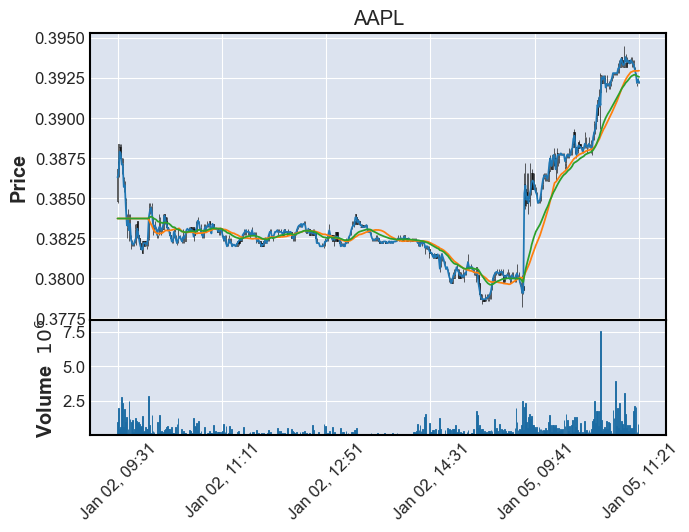

In [31]:
# fig = mpf.figure(style='yahoo',figsize=(10, 10))
# ax1 = fig.add_subplot(3,1,1)
# ax2 = fig.add_subplot(3,1,2)
# ax3 = ax1.twinx()
extras = ['vwap', 'MA', 'EMA']

ap = [ mpf.make_addplot(df[t], ylabel=t) for t in extras]

mpf.plot(df, type='candle', volume=True, addplot=ap, axtitle='AAPL')
# type(fig)